In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq, ifft

In [139]:
# df = pd.read_csv('Our Recorded Data/Zach EEG Data/Alpha Zach_ExG.csv')
# df = pd.read_csv('Chethan EEG Data/.csv')
# df = pd.read_csv('Our Recorded Data/Chethan EEG Data/Chethan Alpha_ExG.csv')
df = pd.read_csv('Our Recorded Data/Ilia EEG Data/R8 Ilia Angry_ExG.csv')
# df = pd.read_csv('Our Recorded Data/Background EEG/Background Noise_ExG.csv')
# timestamps_df = pd.read_csv('Zach EEG Data/Alpha Zach_Marker.csv')
df

,TimeStamp,P3,P4,F3,F4,FP1,I1,I2,FP2
0,1.390104e+06,1433.90,10928.01,32627.49,31376.03,23911.91,26890.47,10835.08,8649.73
1,1.390104e+06,1852.04,10953.71,32632.21,31373.46,23912.05,26927.52,10887.48,8643.49
2,1.390104e+06,2384.09,11035.21,32633.26,31371.22,23897.94,26965.00,11001.97,8625.65
3,1.390104e+06,2713.20,11117.84,32623.68,31355.29,23877.24,26982.74,11117.41,8603.67
4,1.390104e+06,2723.88,11162.57,32601.22,31334.50,23857.79,26970.20,11172.49,8588.46
...,...,...,...,...,...,...,...,...,...
9627,1.390123e+06,1321.60,10855.91,32638.74,31370.17,23985.67,26840.98,10773.42,8805.23
9628,1.390123e+06,1663.49,10860.59,32648.66,31376.65,23987.25,26872.59,10796.26,8804.37
9629,1.390123e+06,2186.11,10927.34,32656.24,31383.71,23984.39,26917.27,10900.55,8799.22
9630,1.390123e+06,2644.21,11016.42,32652.24,31381.66,23966.98,26948.31,11025.33,8782.20


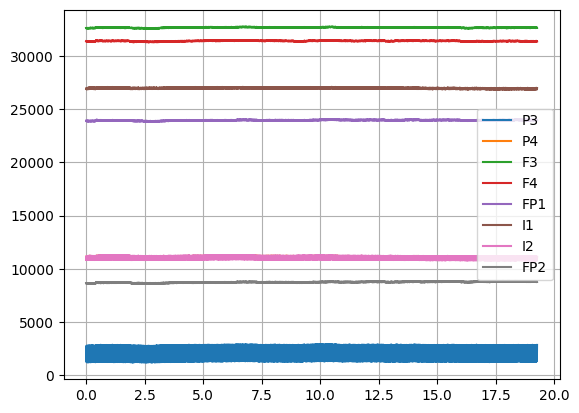

In [140]:
x = np.array(df['TimeStamp'])
x = x - x[0]

# Note that different recordings use different channel names (based on the electrode positions on the head)
for channel in df.columns:
    if channel == "TimeStamp":
        continue
    plt.plot(x, df[channel], label=channel)
plt.legend()
plt.grid()
plt.show()

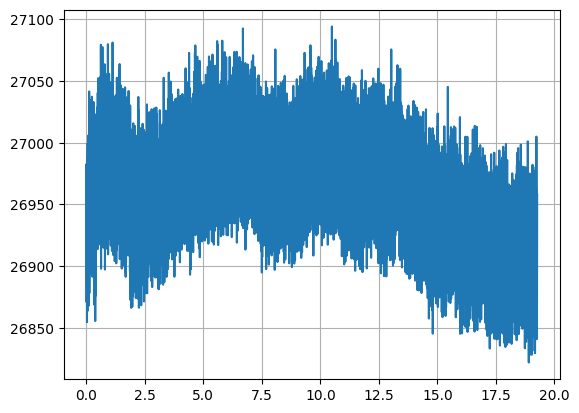

In [147]:
# Work with FP1
y = np.array(df['I1'])
plt.plot(x, y)
plt.grid()
plt.show()

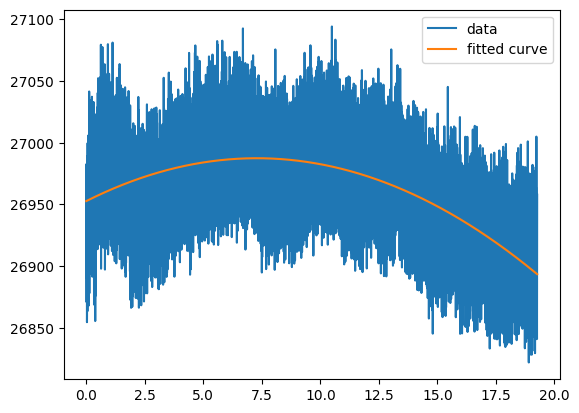

In [148]:
# Get the regression and plot the residual
import numpy as np
import matplotlib.pyplot as plt

# Fit a polynomial of degree 2 (a quadratic function) to the data
p = np.polyfit(x, y, deg=2)

# Evaluate the polynomial at some new points
x_new = x
y_new = np.polyval(p, x_new)

# Plot the original data and the fitted curve
plt.plot(x, y, label='data')
plt.plot(x_new, y_new, label='fitted curve')
plt.legend()
plt.show()

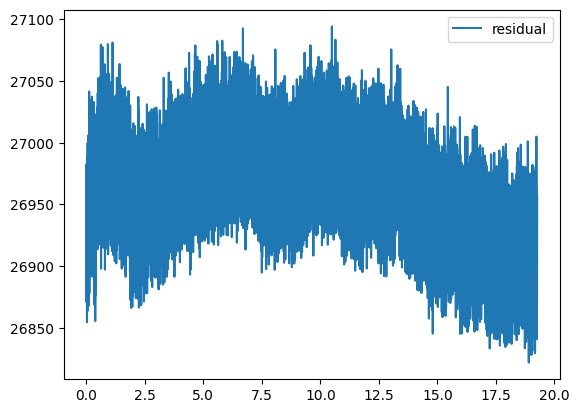

In [149]:
# y = y - y_new
plt.plot(x, y, label='residual')
plt.legend()
plt.show()

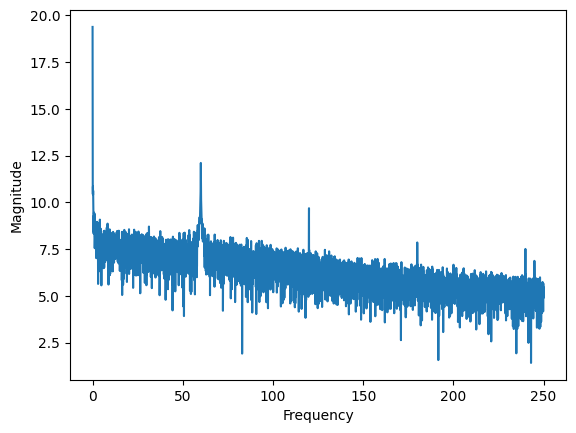

In [150]:
# FFT
n = y.shape[0]
yf = fft(y)[:n//2]
xf = fftfreq(n, x[1] - x[0])[:n//2]

# Plot the FFT
plt.plot(xf, np.log(np.abs(yf)))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

C:\Users\alexa\AppData\Local\Temp\ipykernel_41196\2633319494.py:17: RuntimeWarning: divide by zero encountered in log
  plt.plot(xf, np.log(np.abs(yf)))


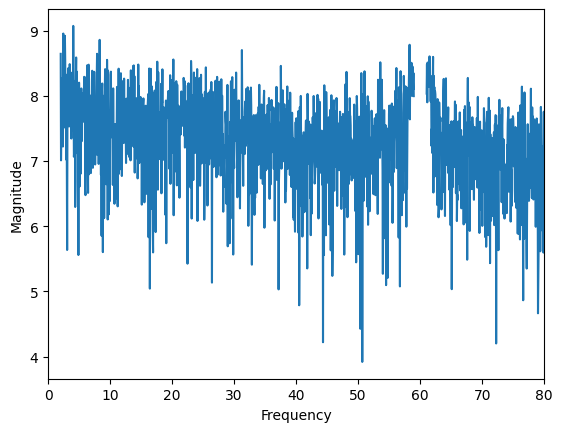

(9632,)
(4816,)


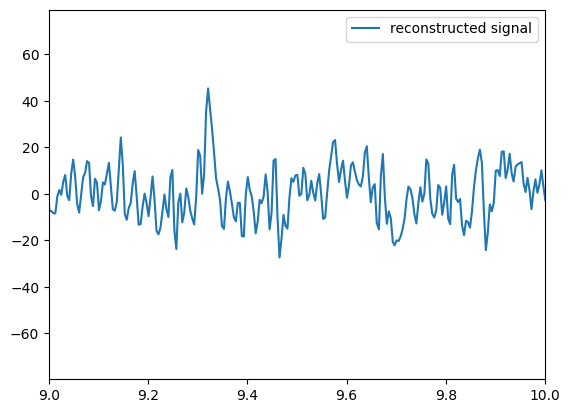

In [155]:
# Remove frequencies under 60, and restore signal using inverse FFT
yf = fft(y)[:n//2]
def remove(freq):
    delta=1
    indices = np.where((xf >= freq-delta) & (xf <= freq+delta))[0]
    yf[indices] = 0#np.exp(7.5)
def remove_upper(freq):
    indices = np.where(xf >= freq)[0]
    yf[indices] = 0#np.exp(7.5)
def remove_range(freq_low, freq_high):
    indices = np.where((xf >= freq_low) & (xf <= freq_high))[0]
    yf[indices] = 0#np.exp(7.5)
remove(60)
remove(120)
remove_upper(80)
remove_range(0,2)
plt.plot(xf, np.log(np.abs(yf)))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.xlim((0, 80))
plt.show()

# restore the signal
y_reconstructed = ifft(yf)
print(x.shape)
print(y_reconstructed.shape)
# plt.plot(x, y, label='original signal')
def every_other(data):
    nn = data.shape[0]
    every_other_index = np.where(np.arange(nn) % 2 == 0)
    return data[every_other_index]
x_r = every_other(x)
plt.plot(x_r, y_reconstructed, label='reconstructed signal')
plt.legend()
plt.xlim((9,10))
plt.show()

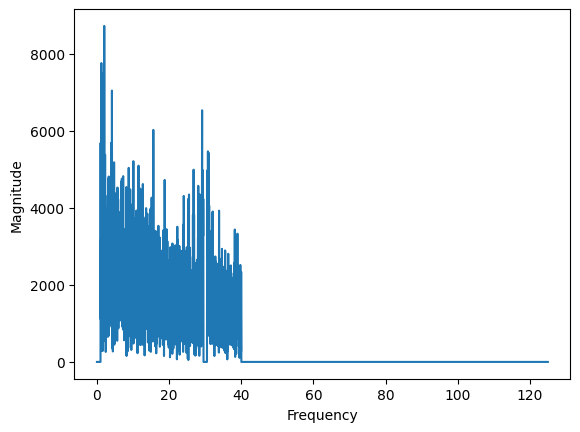

In [156]:
n_r = y_reconstructed.shape[0]
yf_r = fft(y_reconstructed)[:n//2]
xf_r = fftfreq(n, x_r[1] - x_r[0])[:n//2]

# Plot the FFT
plt.plot(xf_r, np.abs(yf_r))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()